# Tahap 1

In [ ]:
import pandas as pd
import re
import string

In [ ]:
df = pd.read_excel('dataset_Berita.xlsx')
df

,Unnamed: 0,Article Content
0,0,Stok vaksin di Kabupaten Blitar menipis. Stok ...
1,1,Stok vaksin Corona di berbagai daerah dilapork...
2,2,Badan Pengawas Obat dan Makanan Amerika Serika...
3,3,Presiden Amerika Serikat (AS) Joe Biden mengat...
4,4,Masih adanya WNA masuk Indonesia saat kasus vi...
...,...,...
1274,14,"08 Mar 2021, 20:26 WIBDiperbarui 08 Mar 2021, ..."
1275,15,"08 Mar 2021, 20:07 WIBDiperbarui 08 Mar 2021, ..."
1276,16,"08 Mar 2021, 18:21 WIBDiperbarui 08 Mar 2021, ..."
1277,17,"08 Mar 2021, 08:14 WIBDiperbarui 08 Mar 2021, ..."


In [ ]:
df['Article Content'] = df['Article Content'].map(lambda x: x if type(x)!=str else x.lower())

In [ ]:
df['Article Content'] = df['Article Content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop) and len(word)>=4])).astype(str).str.replace('\d+', '')

In [ ]:
df['Article Content'] = df['Article Content'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

In [ ]:
df['Article Content'] = df['Article Content'].replace(r'\n',' ', regex=True) 

In [ ]:
df['Article Content'] = df['Article Content'].astype(str).apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

In [ ]:
df

,Unnamed: 0,Article Content
0,0,stok vaksin di kabupaten blitar menipis stok y...
1,1,stok vaksin corona di berbagai daerah dilapork...
2,2,badan pengawas obat dan makanan amerika serika...
3,3,presiden amerika serikat as joe biden mengatak...
4,4,masih adanya wna masuk indonesia saat kasus vi...
...,...,...
1274,14,mar wibdiperbarui mar wib liputancom jak...
1275,15,mar wibdiperbarui mar wib liputancom jak...
1276,16,mar wibdiperbarui mar wib liputancom jak...
1277,17,mar wibdiperbarui mar wib liputancom wel...


In [ ]:
df.to_excel('dataset_Berita_V2.xlsx', encoding='utf-8')

# Tahap 2

In [ ]:
df = pd.read_excel('dataset_Berita_V2.xlsx')
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df

,Article Content
0,stok vaksin di kabupaten blitar menipis stok y...
1,stok vaksin corona di berbagai daerah dilapork...
2,badan pengawas obat dan makanan amerika serika...
3,presiden amerika serikat as joe biden mengatak...
4,masih adanya wna masuk indonesia saat kasus vi...
...,...
1274,indonesia telah menerima lebih dari juta vaks...
1275,indonesia menerima sekitar juta lebih vaksin ...
1276,hari ini senin maret lebih dari satu juta va...
1277,mar wibdiperbarui mar wib liputancom wel...


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop1 = {}
df['Article Content'] = df['Article Content'].astype(str)
df['Article Content'] = df['Article Content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop1)]))

In [ ]:
stop2 = stopwords.words('indonesian')
df['Article Content'] = df['Article Content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))
df

,Article Content
0,stok vaksin kabupaten blitar menipis stok disi...
1,stok vaksin corona daerah dilaporkan menipis l...
2,badan pengawas obat makanan amerika serikat me...
3,presiden amerika serikat biden disinformasi me...
4,masuk indonesia virus corona meroket bikin war...
...,...
1274,indonesia menerima juta vaksin pengiriman vaks...
1275,indonesia menerima juta vaksin virus corona co...
1276,senin maret juta vaksin covid astrazeneca indo...
1277,wibdiperbarui liputancom wellington salah kota...


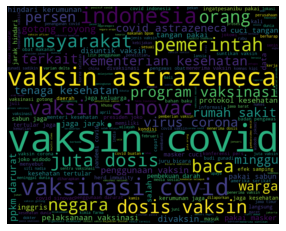

In [ ]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [berita for berita in df['Article Content']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
stop1 = {'vaksin','astrazaneca','sinovac','wibdiperbarui','liputancom','covid','virus','corona','vaksinasi','senin','selasa','rabu','kamis','jumat','sabtu','minggu','astrazeneca','indonesia','baca','masyarakat','divaksin','orang','kementrian','kesehatan','warga','persen','terkait','pandemi','juta','dosis','rumah sakit','salah','pemerintah','negara','divaksinasi','program','menerima','rumah sakit','jaga jarak','cuci tangan','suntikan','masuk','tangan','pakai','data','pakai','masker','rumah sakit','jaga jarak','ppkm darurat','rumah','sakit','jaga','jarak','ppkm','darurat','kerumunan','tertular','sabun','hindari','juni','juli','memiliki','menyebut','cuci','keluarga','presiden','joko','widodo','jakarta','maret','disuntik','inggris','tenaga','kali','daerah','proses','kondisi','upaya','obat','makanan','jokowi','pelaksanaan','langsung','mencapai','cepat','grati','januari','china','informasi','china','pemberian','amerika serikat','gratis','april','berharap','total','penyuntikan','kegiatan','ingatpesanibu','juru bicara','badan pengawas','badan','pengawas','juru','bicara','membantu','kementerian','konferensi pers','amerika','serikat','aman','lokasi','ribu','konferensi','pers','dokter','kebijakan','jawa','barat','budi','gunadi','target','dunia','kerja','berdasarkan','melaksanakan','perusahaan','jawa timur','media','sosial','india','bali','wilayah','komnas','kipi','penerima','peserta','provinsi','penggunaan','sesuai','positif','angka','pfizer','bpom','pusat','disuntikkan','februari','maret','april','mei','juni','juli','agustus','september','oktober','november','desember','tanggal','kepala','lansia','siti','nadia','mendukung','petugas','laporan','percepatan','diharapkan','kematian','produksi','medis','akibat','khusu','moderna','kimia','farma','sinopharm','mengikuti','pekan','mempercepat','nakes','tahap','korea','selatan','kedatangan','khusus','anak','berusia','kejadian','ikutan','puskesmas','efikasi','usia','kejadian','ikutan','puskesmas','bantuan','penelitian','jenis','sasaran','anakanak','penuh','hasil','dikutip','nasional','pasien','berbeda','penuh','tingkat','populasi','tambahan','melanjutkan','pengiriman','sentra','dilaporkan','klini','eropa','penduduk','dilaksanakan','klinis','muncul','klinik','buatan','kemarin','efektif','coba','mencegah','kelompok','kota','kemenkes','ketiga','terpapar','bentuk','selesai','bandung','dina','keputusan','menurutnya','mengaku','arab','saudi','berlaku','dinas','pejabat','perpajakan','gambasvideo','detik','lonjakan','suntik','alasan'}
df['Article Content'] = df['Article Content'].astype(str)
df['Article Content'] = df['Article Content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop1)]))

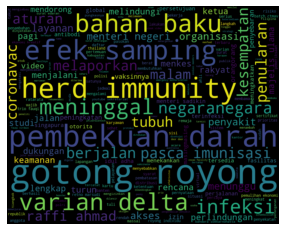

In [ ]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [berita for berita in df['Article Content']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
df

,Article Content
0,stok kabupaten blitar menipis stok disiapkan j...
1,stok menipis langkah diambil menghabiskan stok...
2,meragukan tidaknya booster kekurangan stok sam...
3,biden disinformasi medsos membunuh pejabat med...
4,meroket bikin bertanyatanya imigrasi situasi m...
...,...
1274,petang bandara internasional soekarnohatta dip...
1275,sesi jalur multilateral astrazenecatersebut ba...
1276,tepatnya bandara soekarno hatta sore berat kar...
1277,wellington terbesar selandia aucklandkembali a...


In [ ]:
df.to_excel('dataset_Berita_V3.xlsx', encoding='utf-8')

#Tahap 3

In [ ]:
import pandas as pd
import re
import string
df = pd.read_excel('dataset_Berita_V3.xlsx')
df = df.drop(['Unnamed: 0'], axis=1)
df

,Article Content
0,stok kabupaten blitar menipis stok disiapkan j...
1,stok menipis langkah diambil menghabiskan stok...
2,meragukan tidaknya booster kekurangan stok sam...
3,biden disinformasi medsos membunuh medsos memb...
4,meroket bikin bertanyatanya imigrasi situasi m...
...,...
1274,petang bandara internasional soekarnohatta dip...
1275,sesi jalur multilateral astrazenecatersebut ba...
1276,tepatnya bandara soekarno hatta sore berat kar...
1277,wellington terbesar selandia aucklandkembali a...


In [ ]:
!pip install sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory2 = StopWordRemoverFactory()
stopword = factory2.create_stop_word_remover

In [ ]:
data=[]
for Berita in df['Article Content']:
    katadasar = stemmer.stem(str(Berita))
    hasil=(" ".join(katadasar.split()))
    data.append([hasil])

In [ ]:
datafix= pd.DataFrame(data)

In [ ]:
datafix

,0
0,stok kabupaten blitar tip stok siap jadwal tun...
1,stok tip langkah ambil habis stok pasok arah m...
2,ragu tidak booster kurang stok sampaisampai se...
3,biden disinformasi medsos bunuh medsos bunuh s...
4,roket bikin bertanyatanya imigrasi situasi lan...
...,...
1274,petang bandara internasional soekarnohatta ole...
1275,sesi jalur multilateral astrazenecatersebut ba...
1276,tepat bandara soekarno hatta sore berat karton...
1277,wellington besar selandia aucklandkembali akti...


In [ ]:
datafix = datafix.rename(columns={0:'Berita'})

In [ ]:
stop3={'sedia','jalan','tuju','tingkat','laku','buka','bawa','hubung','butuh','tunda','turun','tekan','periksa','yang'}
datafix['Berita'] = datafix['Berita'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop3) and len(word)>=4]))

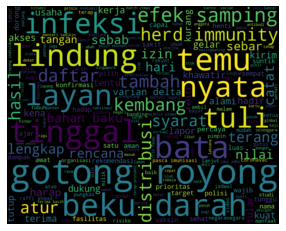

In [ ]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [berita for berita in datafix['Berita']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
datafix.to_excel('dataset_Berita_V4.xlsx')